[Про SciPy и NumPy](https://towardsdatascience.com/random-sampling-using-scipy-and-numpy-part-i-f3ce8c78812e)
[Про метод Бокса-Мюллера](https://ru.frwiki.wiki/wiki/M%C3%A9thode_de_Box-Muller)
[Вопрос про np.random.normal](https://www.reddit.com/r/Python/comments/8wxypc/how_to_search_code_that_implements_nprandomnormal/)

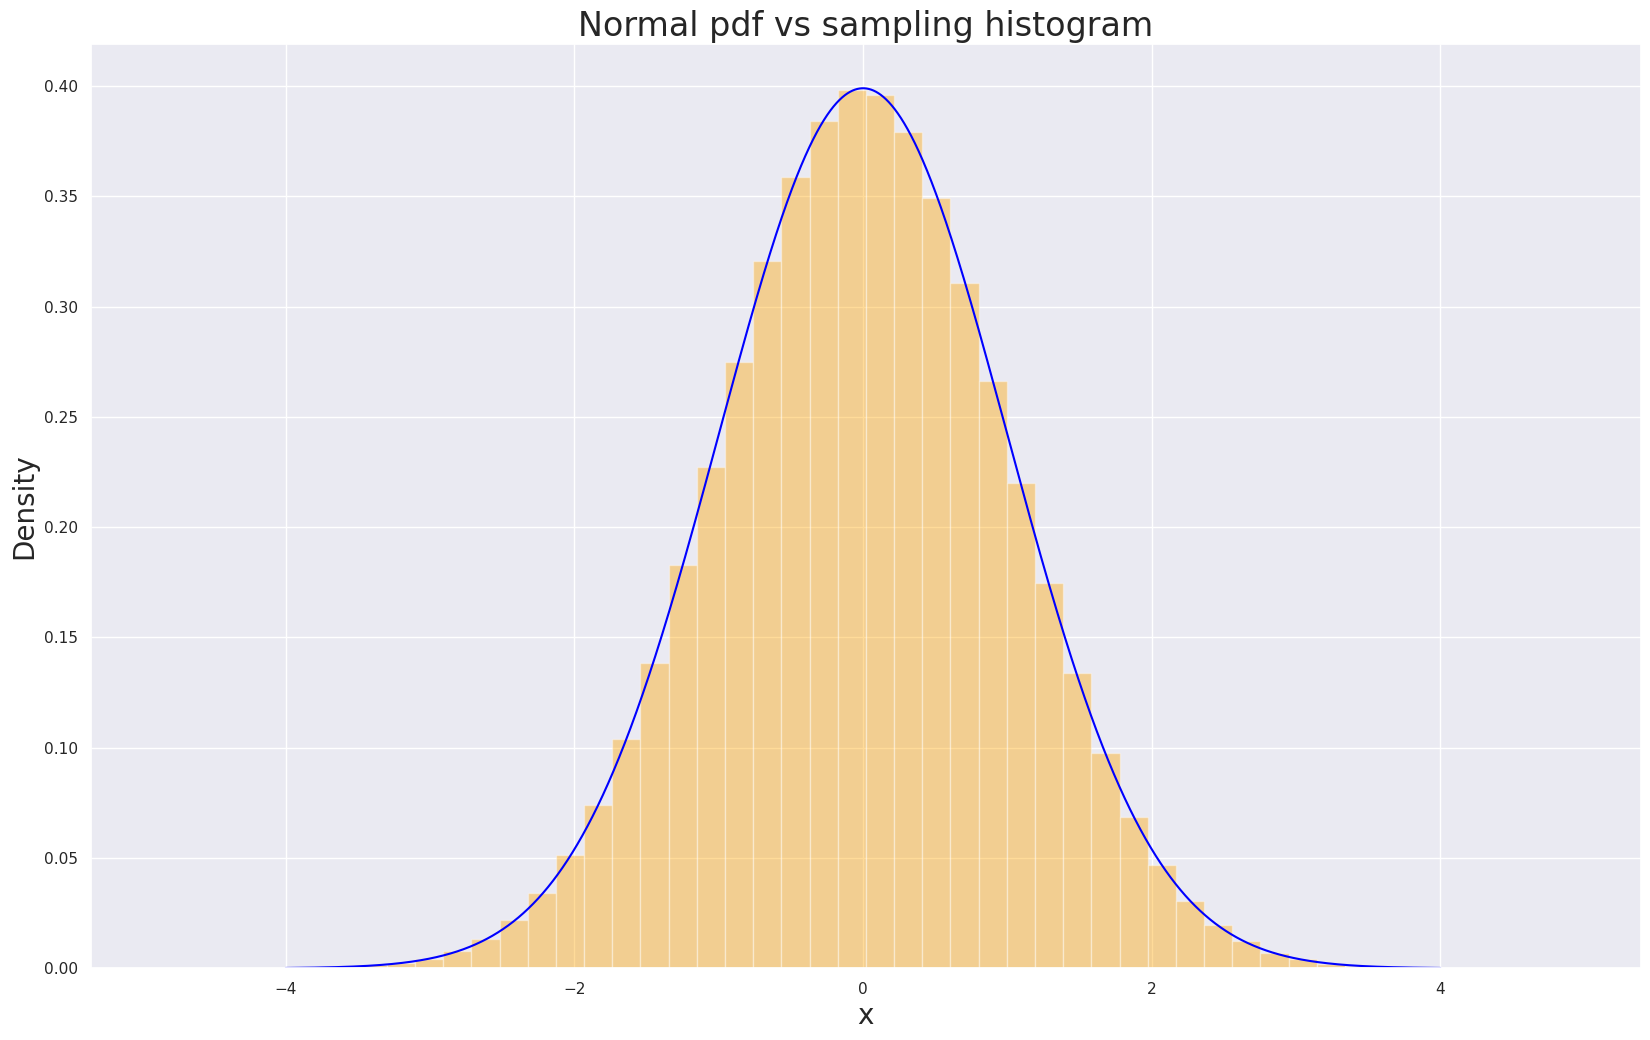

In [8]:
# usual suspects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings

# some config
%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
sns.set()

# create dist
snorm = stats.norm()
# create x's
xs = np.linspace(-4, 4, 100001)
# create pdfs
pdfs = snorm.pdf(xs)
# create random samples
n = 1000000
samps = snorm.rvs(size=n)
# plot them
fig, ax = plt.subplots(figsize=(20, 12))
sns.distplot(samps, kde=False, norm_hist=True, color='Orange', ax=ax)
ax.plot(xs, pdfs, color='Blue')
# label them
ax.set_title('Normal pdf vs sampling histogram', fontsize=24)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('Density', fontsize=20);

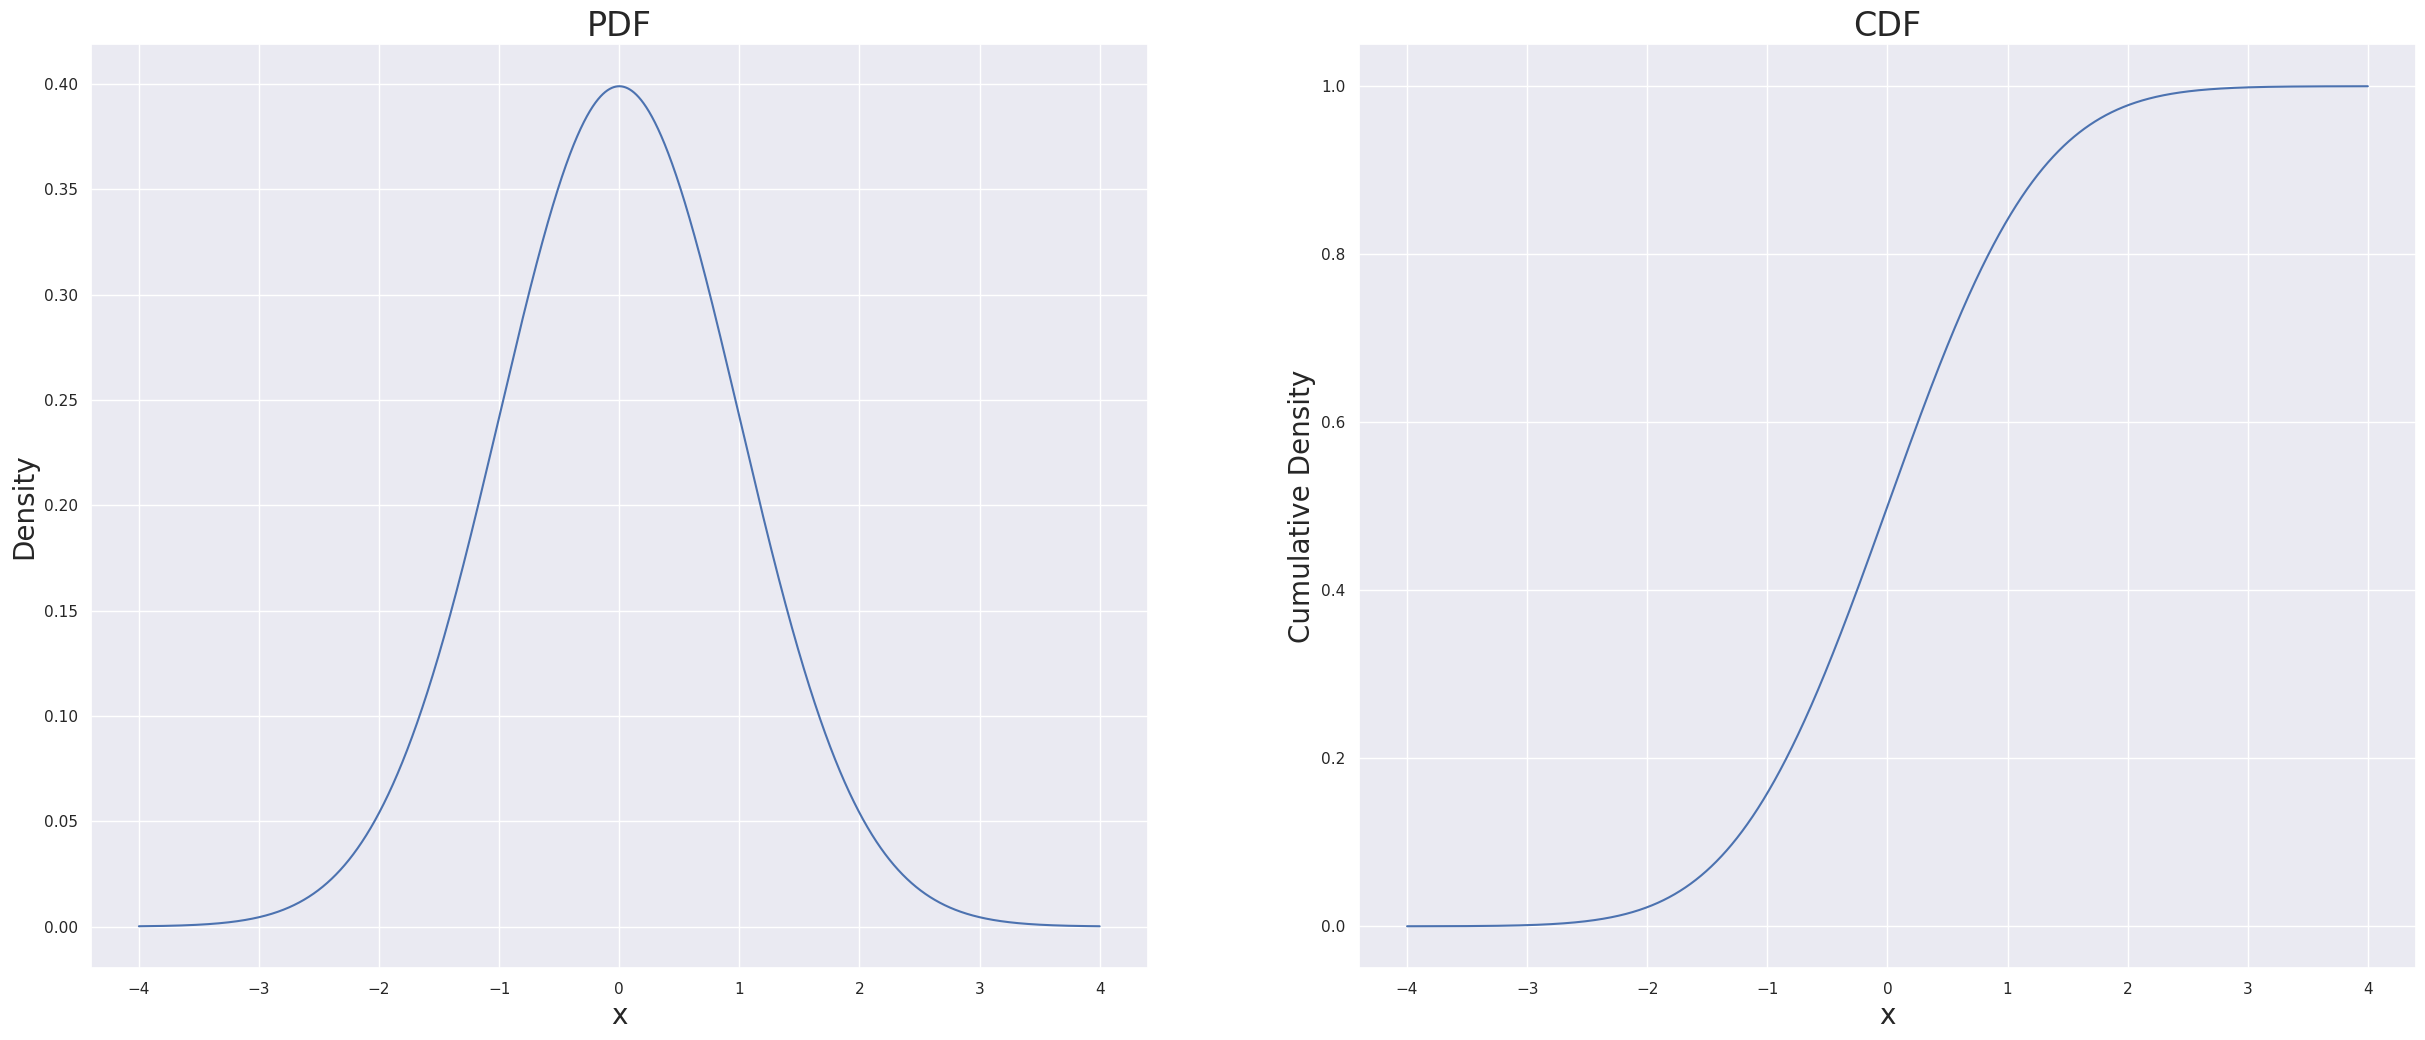

In [14]:
from scipy.interpolate import interp1d
from scipy.integrate import simps

# define std normal pdf
def norm_p(x):
    return np.exp(-0.5 * x**2)

# define function to normalise the PDF over chosen domain
def normalisation(x):
	return simps(norm_p(x), x)

# define x's
xs = np.linspace(-25, 25, 10000001)

# define function to normalise our pdf to sum to 1 so it satisfies a distribution
norm_constant = normalisation(xs)
# create pdf
my_pdfs = norm_p(xs) / norm_constant
# create cdf then ensure it is bounded at [0,1]
my_cdf = np.cumsum(my_pdfs)
my_cdf = my_cdf / my_cdf[-1]

# plot
fig, axes = plt.subplots(ncols=2, figsize=(30, 12))
axes = axes.reshape(-1)

# get index bounds
stds = 4
lower = int(len(xs) // 2 - ((len(xs)-1) / 50)*stds)
upper = int(len(xs) // 2 + ((len(xs)-1) / 50)*stds)

#plot pdf
axes[0].plot(xs[lower: upper], my_pdfs[lower: upper])
axes[0].set_title('PDF', fontsize=24)
axes[0].set_xlabel('x', fontsize=20)
axes[0].set_ylabel('Density', fontsize=20)
#plot cdf
axes[1].plot(xs[lower: upper], my_cdf[lower: upper])
axes[1].set_title('CDF', fontsize=24)
axes[1].set_xlabel('x', fontsize=20)
axes[1].set_ylabel('Cumulative Density', fontsize=20);

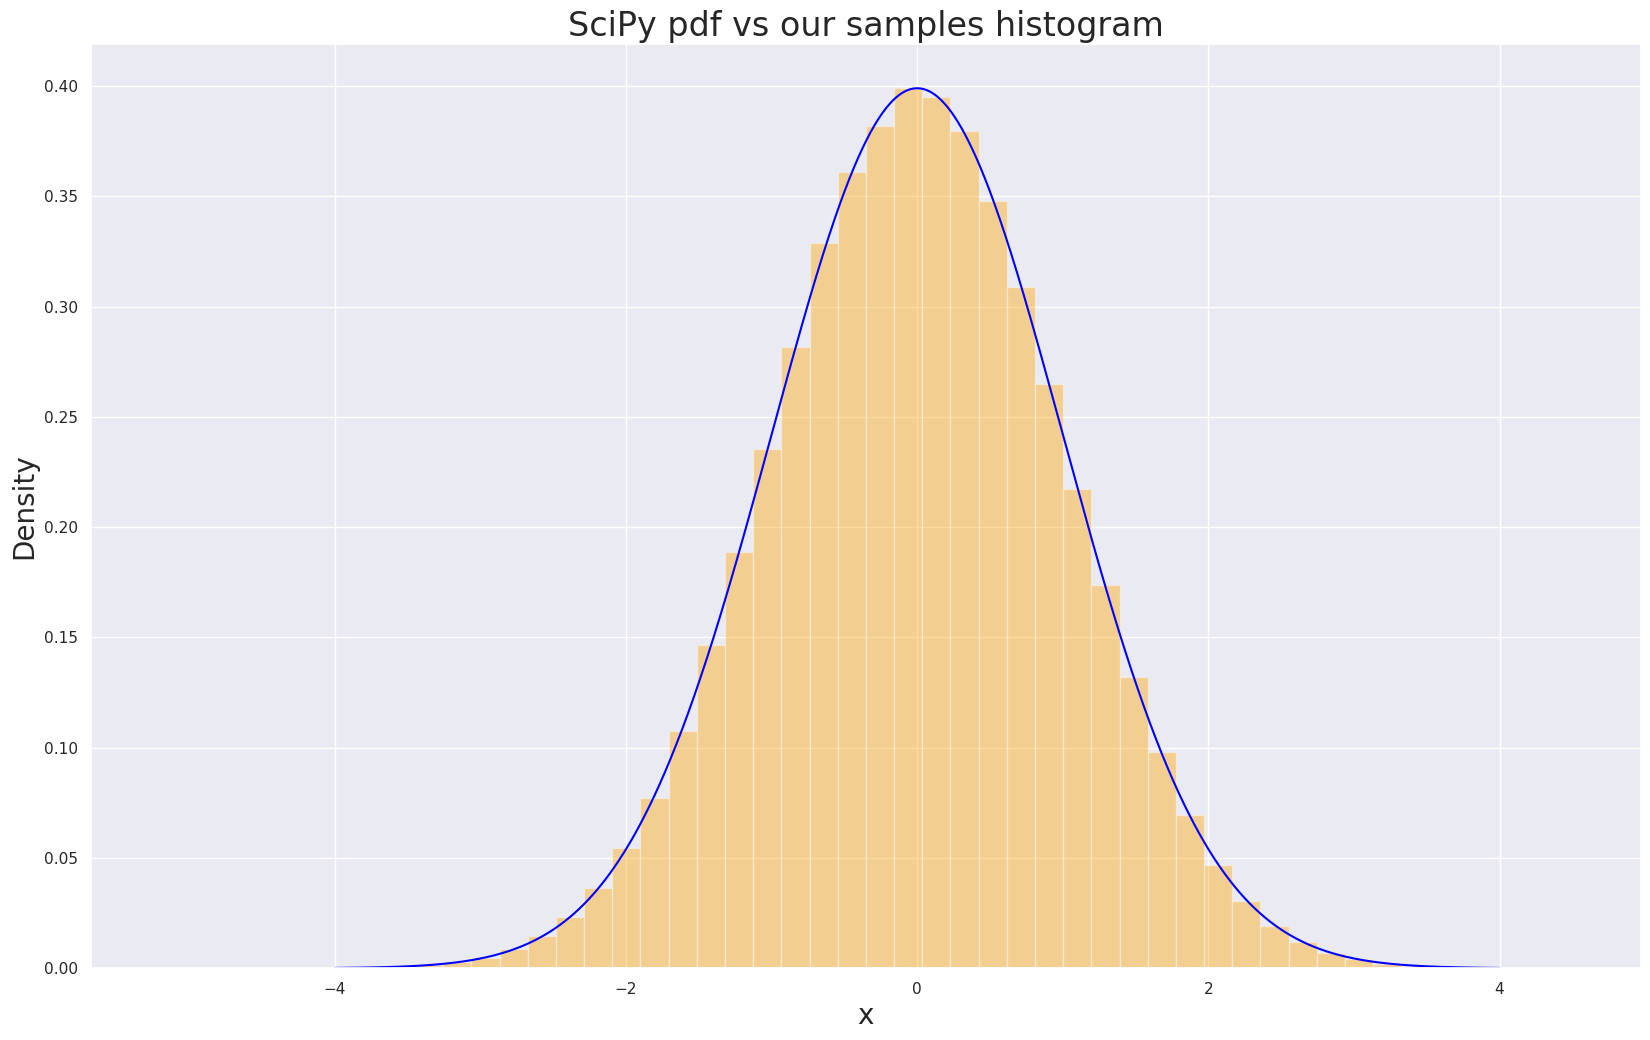

In [15]:
# generate the inverse cdf
func_ppf = interp1d(my_cdf, xs, fill_value='extrapolate')

# define n
n = 1000000
# generate our samps
our_samps = func_ppf(np.random.uniform(size=n))
# generate comparison pdf from SciPy
xs = np.linspace(-4, 4, 1000001)
scipy_pdf = snorm.pdf(xs)

# plot
fig, ax = plt.subplots(figsize=(20, 12))
sns.distplot(our_samps, kde=False, norm_hist=True, color='Orange', ax=ax)
ax.plot(xs, scipy_pdf, color='Blue')
# label them
ax.set_title('SciPy pdf vs our samples histogram', fontsize=24)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('Density', fontsize=20);